# Model will be trained with BinaryInteraction InteractedOnly Data

BinaryInteraction InteractedOnly dataset contains only interacted pairs

The model trained with this data will tend to produce a positive output for each input

So BinaryInteraction InteractedOnly dataset cannot used for training a recommandation model

There is no any expectation from this training

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

In [2]:
#Printing library versions
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)

numpy Version: 1.16.5
pandas Version: 0.25.1
tensorflow Version: 2.0.0


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Reading Qualified BinaryInteraction InteractedOnly training data from pkl file
trainingDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryInteraction/InteractedOnly/Training.pkl")
trainingDf

,UserId,MovieId,Interaction
0,4356,1027,1
1,3946,236,1
2,1399,113,1
3,3078,1586,1
4,8244,806,1
...,...,...,...
753540,3299,795,1
753541,4805,3723,1
753542,8255,94,1
753543,5854,1077,1


In [5]:
#creating a user array for training input 
trainingUser = trainingDf[['UserId']].values.astype(np.int32)
trainingUser = trainingUser.reshape((trainingUser.shape[0]))
trainingUser

array([4356, 3946, 1399, ..., 8255, 5854,  216])

In [6]:
#creating a movie array for training input 
trainingMovie = trainingDf[['MovieId']].values.astype(np.int32)
trainingMovie = trainingMovie.reshape((trainingMovie.shape[0]))
trainingMovie

array([1027,  236,  113, ...,   94, 1077, 1683])

In [7]:
#creating an array for training input 
trainingX = [trainingUser, trainingMovie]
trainingX

[array([4356, 3946, 1399, ..., 8255, 5854,  216]),
 array([1027,  236,  113, ...,   94, 1077, 1683])]

In [8]:
#creating an array for training output 
trainingY = trainingDf[['Interaction']].values.astype(np.int8)
trainingY = trainingY.reshape((trainingY.shape[0]))
trainingY

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [9]:
#Clearing Memory
del trainingDf

In [10]:
#Reading Qualified BinaryInteraction InteractedOnly validation data from pkl file
validationDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryInteraction/InteractedOnly/Validation.pkl")
validationDf

,UserId,MovieId,Interaction
0,7693,399,1
1,9590,1096,1
2,8546,285,1
3,9622,588,1
4,3870,1342,1
...,...,...,...
123669,8317,517,1
123670,2133,25,1
123671,8927,694,1
123672,9450,88,1


In [11]:
#creating a user array for validation input 
validationUser = validationDf[['UserId']].values.astype(np.int32)
validationUser = validationUser.reshape((validationUser.shape[0]))
validationUser

array([7693, 9590, 8546, ..., 8927, 9450, 2806])

In [12]:
#creating a movie array for validation input 
validationMovie = validationDf[['MovieId']].values.astype(np.int32)
validationMovie = validationMovie.reshape((validationMovie.shape[0]))
validationMovie

array([ 399, 1096,  285, ...,  694,   88,   61])

In [13]:
#creating an array for validation input 
validationX = [validationUser, validationMovie]
validationX

[array([7693, 9590, 8546, ..., 8927, 9450, 2806]),
 array([ 399, 1096,  285, ...,  694,   88,   61])]

In [14]:
#creating an array for validation output 
validationY = validationDf[['Interaction']].values.astype(np.int8)
validationY = validationY.reshape((validationY.shape[0]))
validationY

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [15]:
#Clearing Memory
del validationDf

In [16]:
#Setting model variables
userSize = 10073
movieSize = 22033
latentDimensionMF = 4
latentDimensionMLP = 32
regMF = 0
regMLP = 0.01
regDense = 0.01
denseActivation = 'relu'

In [17]:
#Creating Neural Collaborative Filtering(NCF) model

#This Neural matrix factorization model based on https://arxiv.org/pdf/1708.05031.pdf
#As a result of the researches, it was determined as the most useful architecture
#This architecture will be trained with different data types and explanations will be made on the results. 


# input layer
userInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "userId")
movieInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "movieId")

# embedding layers
userEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMF,
    name = 'userEmbeddingMF',
    embeddings_initializer = 'he_normal',
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)
movieEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMF,
    name = "movieEmbeddingMF",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)

userEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMLP,
    name = "userEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)
movieEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMLP,
    name="movieEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)

# MF vector
userLatentMF = tf.keras.layers.Flatten()(userEmbeddingMF(userInput))
movieLatentMF = tf.keras.layers.Flatten()(movieEmbeddingMF(movieInput))
catLatentMF = tf.keras.layers.Multiply()([userLatentMF, movieLatentMF])

# MLP vector
userLatentMLP = tf.keras.layers.Flatten()(userEmbeddingMLP(userInput))
movieLatentMLP = tf.keras.layers.Flatten()(movieEmbeddingMLP(movieInput))
catLatentMLP = tf.keras.layers.Concatenate()([userLatentMLP, movieLatentMLP])

vectorMLP = catLatentMLP

layer = tf.keras.layers.Dense(
    32,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense1'
)

vectorMLP = layer(vectorMLP)

layer = tf.keras.layers.Dense(
    16,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense2'
)

vectorMLP = layer(vectorMLP)

predictLayer = tf.keras.layers.Concatenate()([catLatentMF, vectorMLP])

result = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="lecun_uniform", name="Interaction")

output = result(predictLayer)

model = tf.keras.models.Model(inputs = [userInput, movieInput], outputs = [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
userId (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
movieId (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
userEmbeddingMLP (Embedding)    (None, 32)           322336      userId[0][0]                     
__________________________________________________________________________________________________
movieEmbeddingMLP (Embedding)   (None, 32)           705056      movieId[0][0]                    
______________________________________________________________________________________________

In [18]:
#Compile model
#Since the dataset has 2 label [0, 1] - ['Not Interacted', 'Interacted'] binary crossentropy function will be used as loss function
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.BinaryAccuracy(name="accuracy")
    ])

In [19]:
#Defining CallBack class for save model
class ModelSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #calculation based on epoch + 1 Due to first epoch starts at 0
        if (epoch + 1) % 3 == 0:
            self.model.save("../Model/InteractedOnlyModel/Model{}.h5".format(epoch + 1))

In [20]:
#ignore warnings due to Converting sparse IndexedSlices to a dense Tensor of unknown shape warning
warnings.filterwarnings('ignore')

#Fit the model
#This dataset categorized as interacted movies and not interacted movies
#Our dataset contains only interacted pairs
#Since trainingY and validationY only contains 1 values the model will tend to result in 1 for each input
#Since this data actually cannot use for recommendation model just fitting with small epoch size
#There is no any expectations from this training
with tf.device('/GPU:0'):
    trainingHistory = model.fit(
        x = trainingX,
        y = trainingY,
        batch_size = 64,
        shuffle = True,
        callbacks=[ModelSaver()],
        epochs = 6,
        verbose = 1,
        validation_data = (validationX, validationY),
    )

Train on 753545 samples, validate on 123674 samples
Epoch 1/6
753545/753545 [==============================] - 197s 261us/sample - loss: 0.0237 - tp: 753407.0000 - fp: 0.0000e+00 - tn: 0.0000e+00 - fn: 138.0000 - accuracy: 0.9998 - val_loss: 0.0015 - val_tp: 123674.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/6
753545/753545 [==============================] - 256s 340us/sample - loss: 1.8250e-04 - tp: 753545.0000 - fp: 0.0000e+00 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.8030e-06 - val_tp: 123674.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/6
753545/753545 [==============================] - 255s 338us/sample - loss: 1.3622e-06 - tp: 753545.0000 - fp: 0.0000e+00 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.0800e-06 - val_tp: 123674.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/6
753

In [21]:
#Checking Training history data
trainingHistory.history

{'loss': [0.023691206236229178,
  0.00018249728173862952,
  1.3621651638189278e-06,
  1.0361283266496035e-06,
  1.024063197783591e-06,
  1.0213929672547607e-06],
 'tp': [753407.0, 753545.0, 753545.0, 753545.0, 753545.0, 753545.0],
 'fp': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'tn': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'fn': [138.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'accuracy': [0.9998169, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [0.0014686738958218772,
  1.8030130112839392e-06,
  1.0800193643569693e-06,
  1.0300896404165249e-06,
  1.024238849454289e-06,
  1.0264058228161334e-06],
 'val_tp': [123674.0, 123674.0, 123674.0, 123674.0, 123674.0, 123674.0],
 'val_fp': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_tn': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_fn': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [22]:
#Import pyplot for graphics
from matplotlib import pyplot as plt

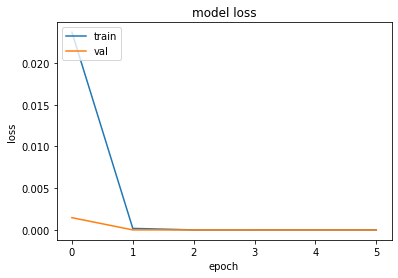

In [23]:
#Loss Graph
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

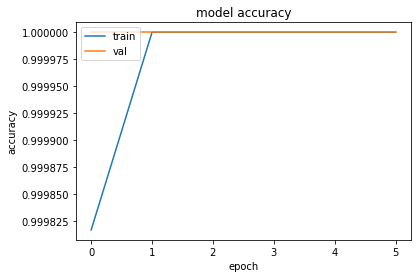

In [24]:
#Accuracy Graph
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

In [25]:
#Reading Qualified BinaryInteraction InteractedOnly test data from pkl file
testDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryInteraction/InteractedOnly/Test.pkl")
testDf

,UserId,MovieId,Interaction
0,6731,149,1
1,3630,626,1
2,205,387,1
3,6673,2122,1
4,9225,3848,1
...,...,...,...
123669,8043,446,1
123670,2928,3526,1
123671,7986,1796,1
123672,2024,2730,1


In [26]:
#creating a user array for test input 
testUser = testDf[['UserId']].values.astype(np.int32)
testUser = testUser.reshape((testUser.shape[0]))
testUser

array([6731, 3630,  205, ..., 7986, 2024, 3251])

In [27]:
#creating a movie array for test input 
testMovie = testDf[['MovieId']].values.astype(np.int32)
testMovie = testMovie.reshape((testMovie.shape[0]))
testMovie

array([ 149,  626,  387, ..., 1796, 2730, 1782])

In [28]:
#creating an array for test input 
testX = [testUser, testMovie]
testX

[array([6731, 3630,  205, ..., 7986, 2024, 3251]),
 array([ 149,  626,  387, ..., 1796, 2730, 1782])]

In [29]:
#creating an array for test output 
testY = testDf[['Interaction']].values.astype(np.int8)
testY = testY.reshape((testY.shape[0]))
testY

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [30]:
#Clearing Memory
del testDf

In [31]:
#Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [32]:
#Print testResult
testResult

[1.0263342611554997e-06, 123674.0, 0.0, 0.0, 0.0, 1.0]

In [33]:
#Print Test Loss
print('Test Loss: ' + str(testResult[0]))

Test Loss: 1.0263342611554997e-06


In [34]:
#Print Test Accuracy
print('Test Accuracy: ' + str(testResult[5]))

Test Accuracy: 1.0


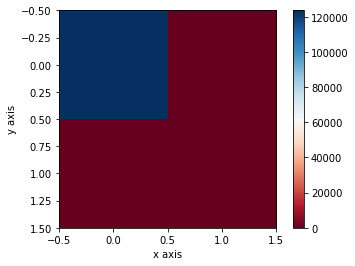

In [35]:
#Confusion Matrix
#[tp][fp]
#[fn][tn]
cm = [[testResult[1], testResult[2]],
      [testResult[4], testResult[3]]]

plt.xlabel('x axis')
plt.ylabel('y axis')

im = plt.imshow(cm,cmap=plt.cm.RdBu)

plt.colorbar(im)
plt.show()

In [36]:
#When the metric graphs are examined, it is seen that the best model is reached between the 1th and 3th epochs.
#After the 3th epoch, the amount of performance does not seem to change much.
#So the model in the 3th epoch is determined as the best model.

#Model3 Loading from h5 file
model = tf.keras.models.load_model("../Model/InteractedOnlyModel/Model3.h5")

In [37]:
#Best Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [38]:
#Print testResult for Best Model
testResult

[1.0791889657176365e-06, 123674.0, 0.0, 0.0, 0.0, 1.0]

In [39]:
#Print Test Loss for Best Model
print('Test Loss: ' + str(testResult[0]))

Test Loss: 1.0791889657176365e-06


In [40]:
#Print Test Accuracy for Best Model
print('Test Accuracy: ' + str(testResult[5]))

Test Accuracy: 1.0


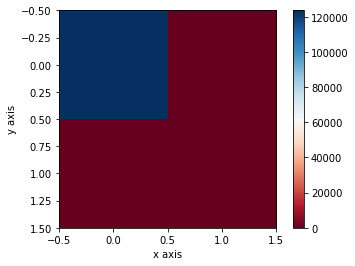

In [41]:
#Confusion Matrix for Best Model
#[tp][fp]
#[fn][tn]
cm = [[testResult[1], testResult[2]],
      [testResult[4], testResult[3]]]

plt.xlabel('x axis')
plt.ylabel('y axis')

im = plt.imshow(cm,cmap=plt.cm.RdBu)

plt.colorbar(im)
plt.show()

# Analysing Result

As can be seen above, the performance of the model obtained at the end of the training and the 3th model that chosen as the best model on the test data is almost equal

In this case, it is pointless to train the model further after the 3th epoch

Graphics look too great to be real for a neural network

This is becouse of this dataset has no negative sample

This is a kind of overfitting
